In [1]:
import pandas as pd
import numpy as np
import warnings
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV, RFE
from sklearn.metrics import roc_curve
from sklearn import pipeline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

warnings.filterwarnings('ignore')

%matplotlib inline
color = sns.color_palette()

# LOAD DATA

In [2]:
train = pd.read_csv('train.csv')
val = pd.read_csv('val.csv')

print(train.shape)
print(val.shape)
print(train.columns)
print(val.columns)

(108405, 22)
(16686, 25)
Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'feature10', 'feature11',
       'feature12', 'feature13', 'feature14', 'feature15', 'feature16',
       'feature17', 'feature18', 'feature19', 'feature20', 'feature21',
       'target'],
      dtype='object')
Index(['id', 'era', 'data_type', 'feature1', 'feature2', 'feature3',
       'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9',
       'feature10', 'feature11', 'feature12', 'feature13', 'feature14',
       'feature15', 'feature16', 'feature17', 'feature18', 'feature19',
       'feature20', 'feature21', 'target'],
      dtype='object')


# TARGET DISTRIBUTION PLOT

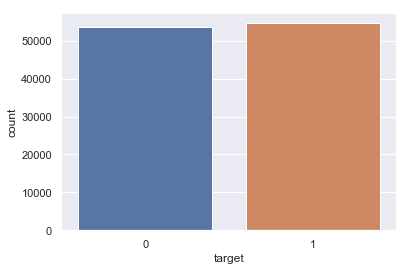

In [3]:
sns.countplot(train['target'], label='Sum')
plt.show()

# SPLIT DATA ON X and Y VARIABLES

In [3]:
# Drop rubbish columns in val set
del val['id']
del val['era']
del val['data_type']

# Split train on y_train and x_train
y_train = train['target']
del train['target']
x_train = train.copy()

# Split val on x_test and y_test
y_test = val['target']
del val['target']
x_test = val.copy()

print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)

(108405,)
(108405, 21)
(16686,)
(16686, 21)


# 1) START TRAINING MODELS
# K-Nearest Neighbors

In [73]:
KNN = KNeighborsClassifier(n_jobs=-1)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, x_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_weighted', 'test_roc_auc'])


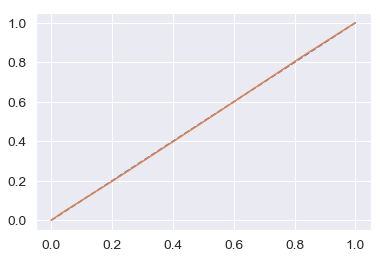

0.3179498195648193 20.460239839553832 0.5029934239356643 0.5028529935560514 0.5028492182074669 0.5028449794896013 0.5045064419940061


In [74]:
print(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
probs = KNN.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(KNN_fit_time, KNN_score_time, KNN_accuracy, KNN_precision, KNN_recall, KNN_f1, KNN_roc)

# Logistic Regression

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_weighted', 'test_roc_auc'])


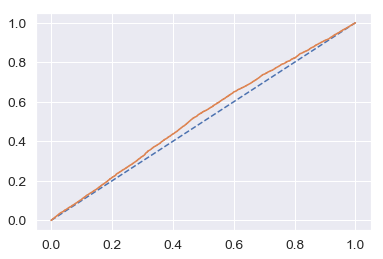

0.7129000663757324 0.03489999771118164 0.5131499326701515 0.5129296768817038 0.5124136279233179 0.5092613285480722 0.5161361031587095


In [75]:
lr = LogisticRegression(n_jobs=-1)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(lr, x_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

print(scores.keys())
lr_fit_time = scores['fit_time'].mean()
lr_score_time = scores['score_time'].mean()
lr_accuracy = scores['test_accuracy'].mean()
lr_precision = scores['test_precision_macro'].mean()
lr_recall = scores['test_recall_macro'].mean()
lr_f1 = scores['test_f1_weighted'].mean()
lr_roc = scores['test_roc_auc'].mean()

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
probs = lr.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(lr_fit_time, lr_score_time, lr_accuracy, lr_precision, lr_recall, lr_f1, lr_roc)

# Naive Bayes

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_weighted', 'test_roc_auc'])


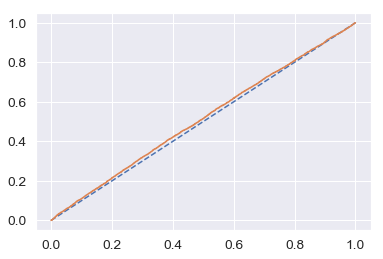

0.0813817024230957 0.1111034870147705 0.5051890082319082 0.5066090774927775 0.50623998558434 0.4969624660638379 0.5093240000585715


In [76]:
nb = GaussianNB()
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(nb, x_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

print(scores.keys())
nb_fit_time = scores['fit_time'].mean()
nb_score_time = scores['score_time'].mean()
nb_accuracy = scores['test_accuracy'].mean()
nb_precision = scores['test_precision_macro'].mean()
nb_recall = scores['test_recall_macro'].mean()
nb_f1 = scores['test_f1_weighted'].mean()
nb_roc = scores['test_roc_auc'].mean()

nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
probs = nb.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(nb_fit_time, nb_score_time, nb_accuracy, nb_precision, nb_recall, nb_f1, nb_roc)

# Decision Tree

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_weighted', 'test_roc_auc'])


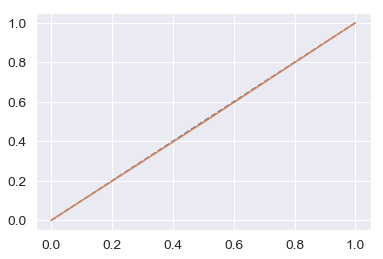

5.912985563278198 0.07319746017456055 0.5007149274172165 0.5006769596277273 0.5006769376165573 0.5007124563356855 0.500681513465487


In [77]:
dt = DecisionTreeClassifier()
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(dt, x_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

print(scores.keys())
dt_fit_time = scores['fit_time'].mean()
dt_score_time = scores['score_time'].mean()
dt_accuracy = scores['test_accuracy'].mean()
dt_precision = scores['test_precision_macro'].mean()
dt_recall = scores['test_recall_macro'].mean()
dt_f1 = scores['test_f1_weighted'].mean()
dt_roc = scores['test_roc_auc'].mean()

dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
probs = dt.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(dt_fit_time, dt_score_time, dt_accuracy, dt_precision, dt_recall, dt_f1, dt_roc)

# Random Forest

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_weighted', 'test_roc_auc'])


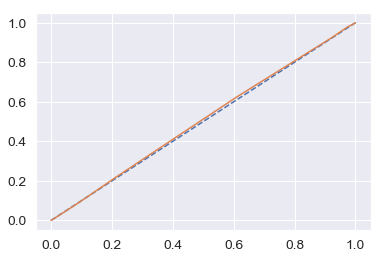

5.840053081512451 0.9172193527221679 0.5015451048744337 0.5024420110703899 0.5023611216497849 0.4967590262417441 0.5028306955487565


In [78]:
rf = RandomForestClassifier(n_jobs=-1)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(rf, x_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

print(scores.keys())
rf_fit_time = scores['fit_time'].mean()
rf_score_time = scores['score_time'].mean()
rf_accuracy = scores['test_accuracy'].mean()
rf_precision = scores['test_precision_macro'].mean()
rf_recall = scores['test_recall_macro'].mean()
rf_f1 = scores['test_f1_weighted'].mean()
rf_roc = scores['test_roc_auc'].mean()

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
probs = rf.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(rf_fit_time, rf_score_time, rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc)

# GradientBoosting


dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_weighted', 'test_roc_auc'])


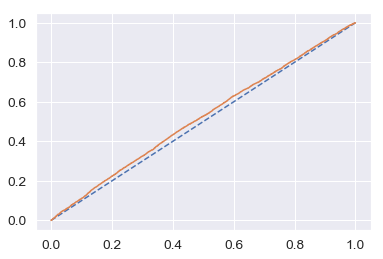

19.924728107452392 0.157179594039917 0.5112126994621592 0.5109388541176199 0.5103042190008344 0.505190779408115 0.5131302302231724


In [79]:
gb = GradientBoostingClassifier()
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(gb, x_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

print(scores.keys())
gb_fit_time = scores['fit_time'].mean()
gb_score_time = scores['score_time'].mean()
gb_accuracy = scores['test_accuracy'].mean()
gb_precision = scores['test_precision_macro'].mean()
gb_recall = scores['test_recall_macro'].mean()
gb_f1 = scores['test_f1_weighted'].mean()
gb_roc = scores['test_roc_auc'].mean()

gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)
probs = gb.predict_proba(x_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(gb_fit_time, gb_score_time, gb_accuracy, gb_precision, gb_recall, gb_f1, gb_roc)

# SAVE SCORES

In [ ]:
# Из-за того, что модели очень долго тренеруются я буду сохранять, 
# а потом загружать результаты их метрик, что бы иметь возможность 
# ими пользываться не повторяя весь долгий процесс тренировки заново. 

In [80]:
df_scores_init = pd.DataFrame(
    {
        'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'],
        'KNN': [KNN_accuracy, KNN_precision, KNN_recall, KNN_f1, KNN_roc],
        'LR':  [lr_accuracy,  lr_precision,  lr_recall,  lr_f1,  lr_roc ],
        'NB':  [nb_accuracy,  nb_precision,  nb_recall,  nb_f1,  nb_roc ],
        'DT':  [dt_accuracy,  dt_precision,  dt_recall,  dt_f1,  dt_roc ],
        'RF':  [rf_accuracy,  rf_precision,  rf_recall,  rf_f1,  rf_roc ],
        'GB':  [gb_accuracy,  gb_precision,  gb_recall,  gb_f1,  gb_roc ],
    }
)

df_scores_init = df_scores_init.set_index('Metrics')
df_scores_init.to_csv('df_scores_init.csv')
df_scores_init

,KNN,LR,NB,DT,RF,GB
Metrics,,,,,,
Accuracy,0.502993,0.513150,0.505189,0.500715,0.501545,0.511213
Precision,0.502853,0.512930,0.506609,0.500677,0.502442,0.510939
Recall,0.502849,0.512414,0.506240,0.500677,0.502361,0.510304
F1_score,0.502845,0.509261,0.496962,0.500712,0.496759,0.505191
AUC_ROC,0.504506,0.516136,0.509324,0.500682,0.502831,0.513130


# LOAD SCORES


In [81]:
scores_init = pd.read_csv('df_scores_init.csv')

# PRINT SCORES

In [82]:
scores_init = scores_init.set_index('Metrics')
scores_init

,KNN,LR,NB,DT,RF,GB
Metrics,,,,,,
Accuracy,0.502993,0.513150,0.505189,0.500715,0.501545,0.511213
Precision,0.502853,0.512930,0.506609,0.500677,0.502442,0.510939
Recall,0.502849,0.512414,0.506240,0.500677,0.502361,0.510304
F1_score,0.502845,0.509261,0.496962,0.500712,0.496759,0.505191
AUC_ROC,0.504506,0.516136,0.509324,0.500682,0.502831,0.513130


# 2) MAKE CORRELATION ANALYSIS

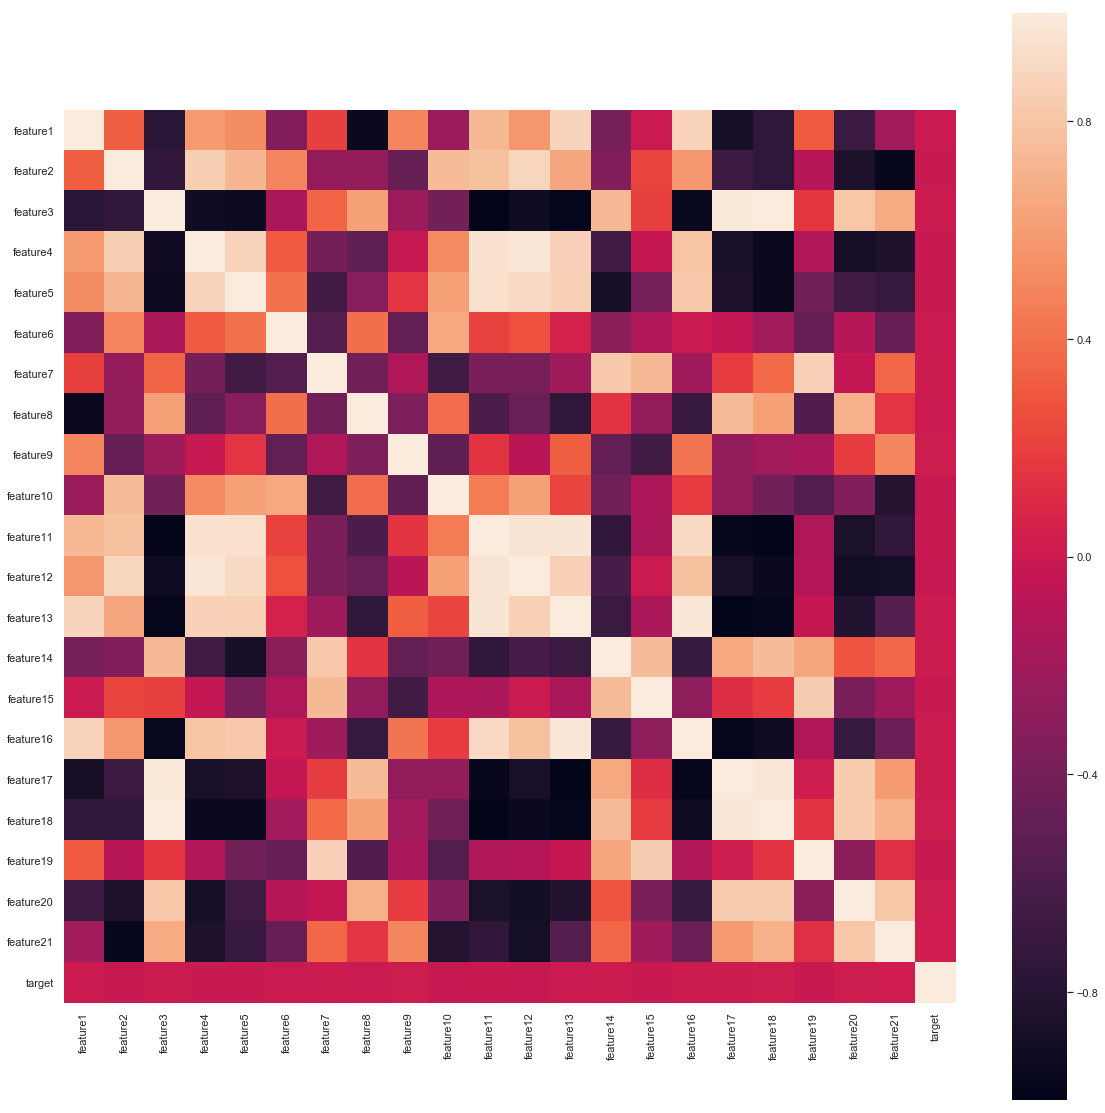

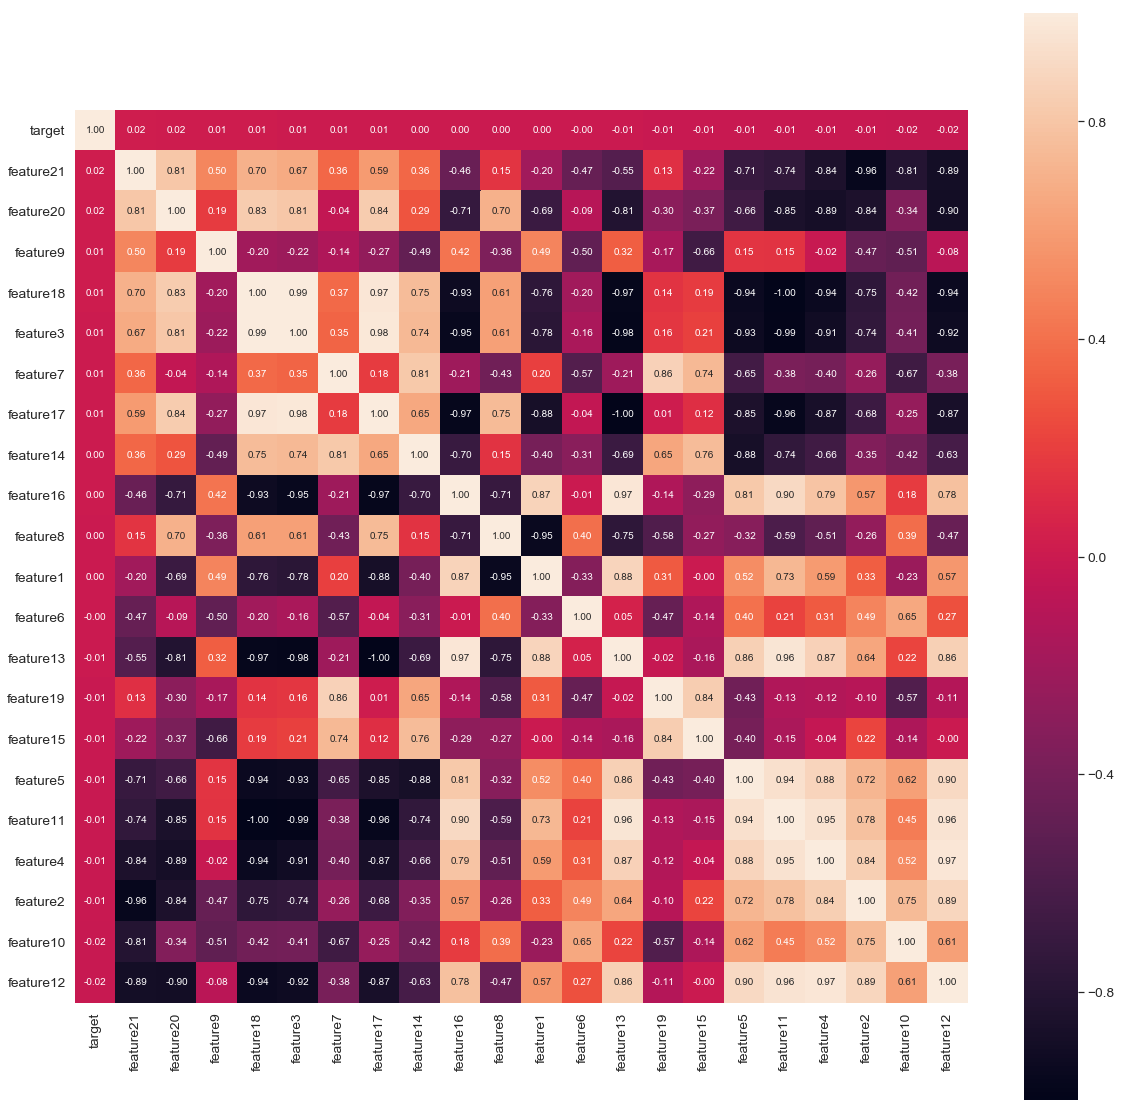

In [21]:
origin_train = pd.read_csv('train.csv')
origin_val = pd.read_csv('val.csv')

# Correlation matrix of all variables
corrmat = origin_train.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, square=True)
plt.show()


# SalePrice`s correlation matrix
k = origin_train.shape[1]  # number of variables for heatmap
cols = corrmat.nlargest(k, 'target')['target'].index
cm = np.corrcoef(origin_train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(20, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

## По результатам корр анализа видно, что каждая фича имеет высокую корреляцию с каждой фичой и в тоже самое время практически отсутствует корреляция с таргетом

In [22]:
# Take only those variable which are filtered after MULTICOLINEARITY test
train_corr = origin_train.copy()
val_corr = origin_val.copy()

rubbish = ['feature14', 'feature16', 'feature8', 'feature1', 'feature6', 'feature13', 'feature5',
           'feature4', 'feature2', 'feature12', 'feature19']

for column in rubbish:
    del train_corr[column]
    del val_corr[column]
    
print(train_corr.columns)
print(val_corr.columns)

Index(['feature3', 'feature7', 'feature9', 'feature10', 'feature11',
       'feature15', 'feature17', 'feature18', 'feature20', 'feature21',
       'target'],
      dtype='object')
Index(['id', 'era', 'data_type', 'feature3', 'feature7', 'feature9',
       'feature10', 'feature11', 'feature15', 'feature17', 'feature18',
       'feature20', 'feature21', 'target'],
      dtype='object')


# SPLIT DATA ON X and Y VARIABLES

In [23]:
# Drop rubbish columns in val set
del val_corr['id']
del val_corr['era']
del val_corr['data_type']

# Split train on y_train and x_train
y_train_corr = train_corr['target']
del train_corr['target']
x_train_corr = train_corr.copy()

# Split val on x_test and y_test
y_test_corr = val_corr['target']
del val_corr['target']
x_test_corr = val_corr.copy()

print(y_train_corr.shape)
print(x_train_corr.shape)
print(y_test_corr.shape)
print(x_test_corr.shape)

(108405,)
(108405, 10)
(16686,)
(16686, 10)


# K-Nearest Neighbors

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_weighted', 'test_roc_auc'])


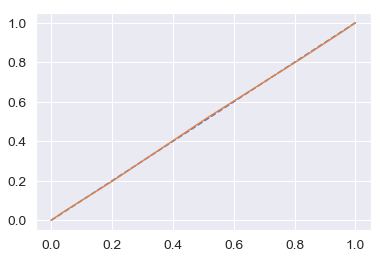

0.1790602684020996 6.566497802734375 0.5017941832179196 0.5016841828415379 0.5016822960084955 0.5017054904001985 0.5013131097498488


In [25]:
KNN = KNeighborsClassifier(n_jobs=-1)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, x_train_corr, y_train_corr, scoring=scoring, cv=5, n_jobs=-1)

print(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

KNN.fit(x_train_corr, y_train_corr)
y_pred = KNN.predict(x_test_corr)
probs = KNN.predict_proba(x_test_corr)
probs = probs[:, 1]
auc = roc_auc_score(y_test_corr, probs)
fpr, tpr, thresholds = roc_curve(y_test_corr, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(KNN_fit_time, KNN_score_time, KNN_accuracy, KNN_precision, KNN_recall, KNN_f1, KNN_roc)

# Logistic Regression

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_weighted', 'test_roc_auc'])


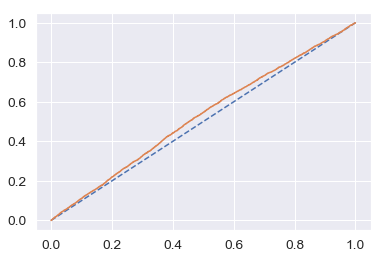

0.6077746868133544 0.030712366104125977 0.513426662886485 0.5132590236662518 0.5125005605642099 0.5072568158498223 0.51594733152097


In [32]:
lr = LogisticRegression(n_jobs=-1)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(lr, x_train_corr, y_train_corr, scoring=scoring, cv=5, n_jobs=-1)

print(scores.keys())
lr_fit_time = scores['fit_time'].mean()
lr_score_time = scores['score_time'].mean()
lr_accuracy = scores['test_accuracy'].mean()
lr_precision = scores['test_precision_macro'].mean()
lr_recall = scores['test_recall_macro'].mean()
lr_f1 = scores['test_f1_weighted'].mean()
lr_roc = scores['test_roc_auc'].mean()

lr.fit(x_train_corr, y_train_corr)
y_pred = lr.predict(x_test_corr)
probs = lr.predict_proba(x_test_corr)
probs = probs[:, 1]
auc = roc_auc_score(y_test_corr, probs)
fpr, tpr, thresholds = roc_curve(y_test_corr, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(lr_fit_time, lr_score_time, lr_accuracy, lr_precision, lr_recall, lr_f1, lr_roc)

# Naive Bayes

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_weighted', 'test_roc_auc'])


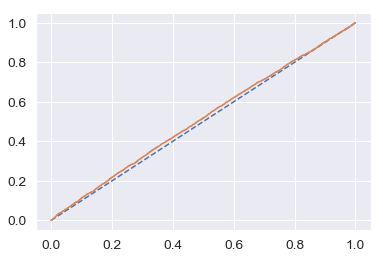

0.044873523712158206 0.06503167152404785 0.505345833949072 0.5064119725355606 0.50620096041805 0.499826411482192 0.5101917384541406


In [30]:
nb = GaussianNB()
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(nb, x_train_corr, y_train_corr, scoring=scoring, cv=5, n_jobs=-1)

print(scores.keys())
nb_fit_time = scores['fit_time'].mean()
nb_score_time = scores['score_time'].mean()
nb_accuracy = scores['test_accuracy'].mean()
nb_precision = scores['test_precision_macro'].mean()
nb_recall = scores['test_recall_macro'].mean()
nb_f1 = scores['test_f1_weighted'].mean()
nb_roc = scores['test_roc_auc'].mean()

nb.fit(x_train_corr, y_train_corr)
y_pred = nb.predict(x_test_corr)
probs = nb.predict_proba(x_test_corr)
probs = probs[:, 1]
auc = roc_auc_score(y_test_corr, probs)
fpr, tpr, thresholds = roc_curve(y_test_corr, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(nb_fit_time, nb_score_time, nb_accuracy, nb_precision, nb_recall, nb_f1, nb_roc)

# Decision Tree

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_weighted', 'test_roc_auc'])


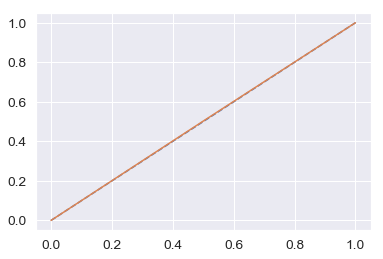

2.7699923515319824 0.06422610282897949 0.5004381669922454 0.5004125873316114 0.5004126852711719 0.5004363106000724 0.5004034382686402


In [33]:
dt = DecisionTreeClassifier()
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(dt, x_train_corr, y_train_corr, scoring=scoring, cv=5, n_jobs=-1)

print(scores.keys())
dt_fit_time = scores['fit_time'].mean()
dt_score_time = scores['score_time'].mean()
dt_accuracy = scores['test_accuracy'].mean()
dt_precision = scores['test_precision_macro'].mean()
dt_recall = scores['test_recall_macro'].mean()
dt_f1 = scores['test_f1_weighted'].mean()
dt_roc = scores['test_roc_auc'].mean()

dt.fit(x_train_corr, y_train_corr)
y_pred = dt.predict(x_test_corr)
probs = dt.predict_proba(x_test_corr)
probs = probs[:, 1]
auc = roc_auc_score(y_test_corr, probs)
fpr, tpr, thresholds = roc_curve(y_test_corr, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(dt_fit_time, dt_score_time, dt_accuracy, dt_precision, dt_recall, dt_f1, dt_roc)

# Random Forest

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_weighted', 'test_roc_auc'])


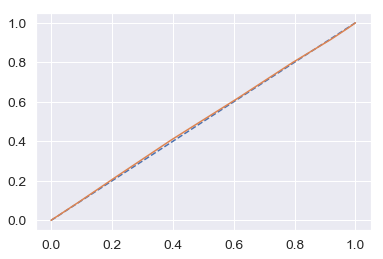

4.541399240493774 0.8079824447631836 0.4984456228028389 0.4992225804267817 0.49924854103882427 0.4937892306949439 0.500698491074511


In [34]:
rf = RandomForestClassifier(n_jobs=-1)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(rf, x_train_corr, y_train_corr, scoring=scoring, cv=5, n_jobs=-1)

print(scores.keys())
rf_fit_time = scores['fit_time'].mean()
rf_score_time = scores['score_time'].mean()
rf_accuracy = scores['test_accuracy'].mean()
rf_precision = scores['test_precision_macro'].mean()
rf_recall = scores['test_recall_macro'].mean()
rf_f1 = scores['test_f1_weighted'].mean()
rf_roc = scores['test_roc_auc'].mean()

rf.fit(x_train_corr, y_train_corr)
y_pred = rf.predict(x_test_corr)
probs = rf.predict_proba(x_test_corr)
probs = probs[:, 1]
auc = roc_auc_score(y_test_corr, probs)
fpr, tpr, thresholds = roc_curve(y_test_corr, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(rf_fit_time, rf_score_time, rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc)

# GradientBoosting

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_weighted', 'test_roc_auc'])


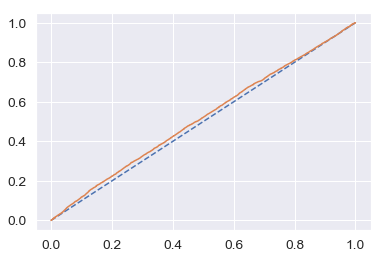

10.072866249084473 0.13045907020568848 0.5064435118535313 0.5058745149191084 0.505422042789027 0.4987196658984693 0.5098252287941687


In [36]:
gb = GradientBoostingClassifier()
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(gb, x_train_corr, y_train_corr, scoring=scoring, cv=5, n_jobs=-1)

print(scores.keys())
gb_fit_time = scores['fit_time'].mean()
gb_score_time = scores['score_time'].mean()
gb_accuracy = scores['test_accuracy'].mean()
gb_precision = scores['test_precision_macro'].mean()
gb_recall = scores['test_recall_macro'].mean()
gb_f1 = scores['test_f1_weighted'].mean()
gb_roc = scores['test_roc_auc'].mean()

gb.fit(x_train_corr, y_train_corr)
y_pred = gb.predict(x_test_corr)
probs = gb.predict_proba(x_test_corr)
probs = probs[:, 1]
auc = roc_auc_score(y_test_corr, probs)
fpr, tpr, thresholds = roc_curve(y_test_corr, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(gb_fit_time, gb_score_time, gb_accuracy, gb_precision, gb_recall, gb_f1, gb_roc)

# SAVE SCORES

In [ ]:
# Из-за того, что модели очень долго тренеруются я буду сохранять, 
# а потом загружать результаты их метрик, что бы иметь возможность 
# ими пользываться не повторяя весь долгий процесс тренировки заново. 

In [37]:
df_scores_corr = pd.DataFrame(
    {
        'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'],
        'KNN': [KNN_accuracy, KNN_precision, KNN_recall, KNN_f1, KNN_roc],
        'LR':  [lr_accuracy,  lr_precision,  lr_recall,  lr_f1,  lr_roc ],
        'NB':  [nb_accuracy,  nb_precision,  nb_recall,  nb_f1,  nb_roc ],
        'DT':  [dt_accuracy,  dt_precision,  dt_recall,  dt_f1,  dt_roc ],
        'RF':  [rf_accuracy,  rf_precision,  rf_recall,  rf_f1,  rf_roc ],
        'GB':  [gb_accuracy,  gb_precision,  gb_recall,  gb_f1,  gb_roc ],
    }
)

df_scores_corr = df_scores_corr.set_index('Metrics')
df_scores_corr.to_csv('df_scores_corr.csv')
df_scores_corr

,KNN,LR,NB,DT,RF,GB
Metrics,,,,,,
Accuracy,0.501794,0.513427,0.505346,0.500438,0.498446,0.506444
Precision,0.501684,0.513259,0.506412,0.500413,0.499223,0.505875
Recall,0.501682,0.512501,0.506201,0.500413,0.499249,0.505422
F1_score,0.501705,0.507257,0.499826,0.500436,0.493789,0.498720
AUC_ROC,0.501313,0.515947,0.510192,0.500403,0.500698,0.509825


# LOAD SCORES

In [38]:
scores_corr = pd.read_csv('df_scores_corr.csv')

# PRINT SCORES

In [39]:
scores_corr = scores_corr.set_index('Metrics')
scores_corr

,KNN,LR,NB,DT,RF,GB
Metrics,,,,,,
Accuracy,0.501794,0.513427,0.505346,0.500438,0.498446,0.506444
Precision,0.501684,0.513259,0.506412,0.500413,0.499223,0.505875
Recall,0.501682,0.512501,0.506201,0.500413,0.499249,0.505422
F1_score,0.501705,0.507257,0.499826,0.500436,0.493789,0.498720
AUC_ROC,0.501313,0.515947,0.510192,0.500403,0.500698,0.509825


# 3) MAKE Recursive feature elimination (RFE)

# Decision Tree

(108405, 10)
(16686, 10)


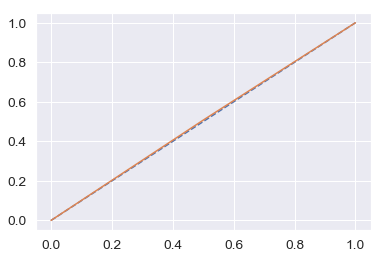

2.452241086959839 0.05924158096313477 0.50082558512365 0.5007563879481778 0.5007564114138614 0.500797108843873 0.5007564114138614


In [42]:
dt = DecisionTreeClassifier()
selector = RFE(dt)
select = selector.fit(x_train, y_train)
selector_train = select.transform(x_train)
selector_test = select.transform(x_test)
print(selector_train.shape)
print(selector_test.shape)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(dt, selector_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

dt_fit_time = scores['fit_time'].mean()
dt_score_time = scores['score_time'].mean()
dt_accuracy = scores['test_accuracy'].mean()
dt_precision = scores['test_precision_macro'].mean()
dt_recall = scores['test_recall_macro'].mean()
dt_f1 = scores['test_f1_weighted'].mean()
dt_roc = scores['test_roc_auc'].mean()

dt.fit(selector_train, y_train)
y_pred = dt.predict(selector_test)
probs = dt.predict_proba(selector_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(dt_fit_time, dt_score_time, dt_accuracy, dt_precision, dt_recall, dt_f1, dt_roc)

# Logistic Regression

(108405, 10)
(16686, 10)


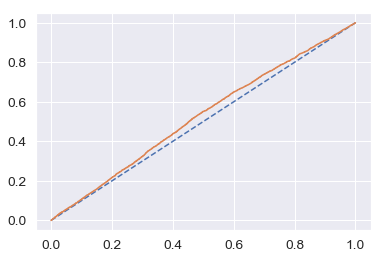

0.4310603141784668 0.02852344512939453 0.5137034169303317 0.5134741432404587 0.5129519172113219 0.5096671865881174 0.5169307218751189


In [46]:
lr = LogisticRegression(n_jobs=-1)
selector = RFE(lr)
select = selector.fit(x_train, y_train)
selector_train = select.transform(x_train)
selector_test = select.transform(x_test)
print(selector_train.shape)
print(selector_test.shape)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(lr, selector_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

lr_fit_time = scores['fit_time'].mean()
lr_score_time = scores['score_time'].mean()
lr_accuracy = scores['test_accuracy'].mean()
lr_precision = scores['test_precision_macro'].mean()
lr_recall = scores['test_recall_macro'].mean()
lr_f1 = scores['test_f1_weighted'].mean()
lr_roc = scores['test_roc_auc'].mean()

lr.fit(selector_train, y_train)
y_pred = lr.predict(selector_test)
probs = lr.predict_proba(selector_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(lr_fit_time, lr_score_time, lr_accuracy, lr_precision, lr_recall, lr_f1, lr_roc)

# Naive Bayes

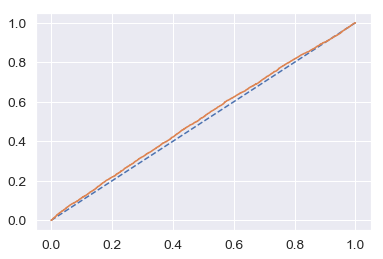

0.0576439380645752 0.07101106643676758 0.5061484025091552 0.5070852853385159 0.5069343958444854 0.5011533822816759 0.5112982036478286


In [48]:
# Naive Bayes не имеет возможность использывать RFE -> поэтому он будет использывать 
# данные с выбраными фичами для LR
nb = GaussianNB()
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(nb, selector_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

nb_fit_time = scores['fit_time'].mean()
nb_score_time = scores['score_time'].mean()
nb_accuracy = scores['test_accuracy'].mean()
nb_precision = scores['test_precision_macro'].mean()
nb_recall = scores['test_recall_macro'].mean()
nb_f1 = scores['test_f1_weighted'].mean()
nb_roc = scores['test_roc_auc'].mean()

nb.fit(selector_train, y_train)
y_pred = nb.predict(selector_test)
probs = nb.predict_proba(selector_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(nb_fit_time, nb_score_time, nb_accuracy, nb_precision, nb_recall, nb_f1, nb_roc)

# Random Forest 

(108405, 10)
(16686, 10)
dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_weighted', 'test_roc_auc'])


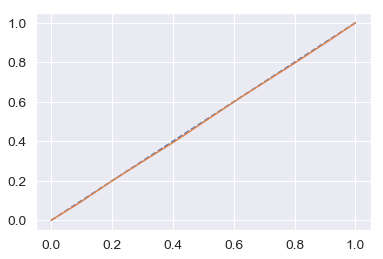

4.1203855037689205 0.728508472442627 0.501729596938042 0.5026566624839776 0.5025496166345579 0.496899192271835 0.5033842792921963


In [49]:
rf = RandomForestClassifier(n_jobs=-1)
selector = RFE(rf)
select = selector.fit(x_train, y_train)
selector_train = select.transform(x_train)
selector_test = select.transform(x_test)
print(selector_train.shape)
print(selector_test.shape)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(rf, selector_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

print(scores.keys())
rf_fit_time = scores['fit_time'].mean()
rf_score_time = scores['score_time'].mean()
rf_accuracy = scores['test_accuracy'].mean()
rf_precision = scores['test_precision_macro'].mean()
rf_recall = scores['test_recall_macro'].mean()
rf_f1 = scores['test_f1_weighted'].mean()
rf_roc = scores['test_roc_auc'].mean()

rf.fit(selector_train, y_train)
y_pred = rf.predict(selector_test)
probs = rf.predict_proba(selector_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(rf_fit_time, rf_score_time, rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc)

# Gradient Boosting

(108405, 10)
(16686, 10)
dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_weighted', 'test_roc_auc'])


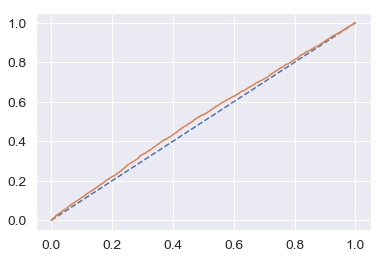

12.874552917480468 0.13305845260620117 0.5096814166916401 0.5094544625814583 0.5087394450586956 0.5028661142172941 0.5135618089154915


In [50]:
gb = GradientBoostingClassifier()
selector = RFE(gb)
select = selector.fit(x_train, y_train)
selector_train = select.transform(x_train)
selector_test = select.transform(x_test)
print(selector_train.shape)
print(selector_test.shape)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(gb, selector_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

print(scores.keys())
gb_fit_time = scores['fit_time'].mean()
gb_score_time = scores['score_time'].mean()
gb_accuracy = scores['test_accuracy'].mean()
gb_precision = scores['test_precision_macro'].mean()
gb_recall = scores['test_recall_macro'].mean()
gb_f1 = scores['test_f1_weighted'].mean()
gb_roc = scores['test_roc_auc'].mean()

gb.fit(selector_train, y_train)
y_pred = gb.predict(selector_test)
probs = gb.predict_proba(selector_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(gb_fit_time, gb_score_time, gb_accuracy, gb_precision, gb_recall, gb_f1, gb_roc)

# K-Nearest Neighbors

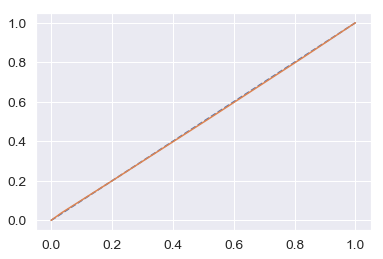

0.1853039264678955 8.618279266357423 0.5029564508128256 0.5028354512361449 0.5028333365556928 0.5028529639448498 0.5044055846373208


In [51]:
# K-Nearest Neighbors не имеет возможность использывать RFE -> поэтому он будет использывать 
# данные с выбраными фичами для Gradient Boosting
KNN = KNeighborsClassifier(n_jobs=-1)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, selector_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()


KNN.fit(selector_train, y_train)
y_pred = KNN.predict(selector_test)
probs = KNN.predict_proba(selector_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(KNN_fit_time, KNN_score_time, KNN_accuracy, KNN_precision, KNN_recall, KNN_f1, KNN_roc)

# SAVE SCORES

In [ ]:
# Из-за того, что модели очень долго тренеруются я буду сохранять, 
# а потом загружать результаты их метрик, что бы иметь возможность 
# ими пользываться не повторяя весь долгий процесс тренировки заново.

In [52]:
df_scores_rfe = pd.DataFrame(
    {
        'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'],
        'KNN': [KNN_accuracy, KNN_precision, KNN_recall, KNN_f1, KNN_roc],
        'LR':  [lr_accuracy,  lr_precision,  lr_recall,  lr_f1,  lr_roc ],
        'NB':  [nb_accuracy,  nb_precision,  nb_recall,  nb_f1,  nb_roc ],
        'DT':  [dt_accuracy,  dt_precision,  dt_recall,  dt_f1,  dt_roc ],
        'RF':  [rf_accuracy,  rf_precision,  rf_recall,  rf_f1,  rf_roc ],
        'GB':  [gb_accuracy,  gb_precision,  gb_recall,  gb_f1,  gb_roc ],
    }
)

df_scores_rfe = df_scores_rfe.set_index('Metrics')
df_scores_rfe.to_csv('df_scores_rfe.csv')
df_scores_rfe

,KNN,LR,NB,DT,RF,GB
Metrics,,,,,,
Accuracy,0.502956,0.513703,0.506148,0.500826,0.501730,0.509681
Precision,0.502835,0.513474,0.507085,0.500756,0.502657,0.509454
Recall,0.502833,0.512952,0.506934,0.500756,0.502550,0.508739
F1_score,0.502853,0.509667,0.501153,0.500797,0.496899,0.502866
AUC_ROC,0.504406,0.516931,0.511298,0.500756,0.503384,0.513562


# LOAD SCORES

In [55]:
scores_rfe = pd.read_csv('df_scores_rfe.csv')

# Print Scores

In [56]:
scores_rfe = scores_rfe.set_index('Metrics')
scores_rfe

,KNN,LR,NB,DT,RF,GB
Metrics,,,,,,
Accuracy,0.502956,0.513703,0.506148,0.500826,0.501730,0.509681
Precision,0.502835,0.513474,0.507085,0.500756,0.502657,0.509454
Recall,0.502833,0.512952,0.506934,0.500756,0.502550,0.508739
F1_score,0.502853,0.509667,0.501153,0.500797,0.496899,0.502866
AUC_ROC,0.504406,0.516931,0.511298,0.500756,0.503384,0.513562


# 4) MAKE Recursive feature elimination with cross validation  (RFECV)

# Decision Tree

(108405, 6)
(16686, 6)


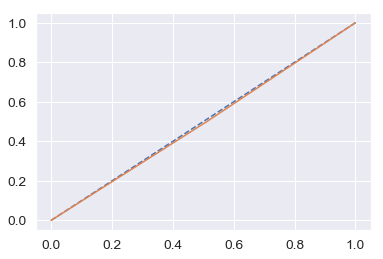

1.5499578952789306 0.0632256031036377 0.5035100099542615 0.5034886333275039 0.5034886341361388 0.5035075701938322 0.5034840327570866


In [57]:
dt = DecisionTreeClassifier()
selector = RFECV(dt)
select = selector.fit(x_train, y_train)
selector_train = select.transform(x_train)
selector_test = select.transform(x_test)
print(selector_train.shape)
print(selector_test.shape)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(dt, selector_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

dt_fit_time = scores['fit_time'].mean()
dt_score_time = scores['score_time'].mean()
dt_accuracy = scores['test_accuracy'].mean()
dt_precision = scores['test_precision_macro'].mean()
dt_recall = scores['test_recall_macro'].mean()
dt_f1 = scores['test_f1_weighted'].mean()
dt_roc = scores['test_roc_auc'].mean()

dt.fit(selector_train, y_train)
y_pred = dt.predict(selector_test)
probs = dt.predict_proba(selector_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(dt_fit_time, dt_score_time, dt_accuracy, dt_precision, dt_recall, dt_f1, dt_roc)

# Logistic Regression

(108405, 17)
(16686, 17)


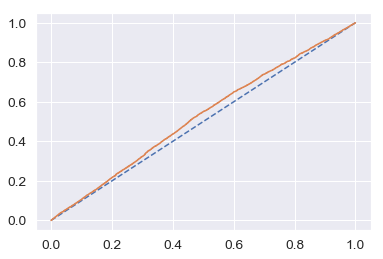

0.6352965354919433 0.028357934951782227 0.5133528710839276 0.5131224116366285 0.5126149016382388 0.5094565405898944 0.5165514370945045


In [58]:
lr = LogisticRegression(n_jobs=-1)
selector = RFECV(lr)
select = selector.fit(x_train, y_train)
selector_train = select.transform(x_train)
selector_test = select.transform(x_test)
print(selector_train.shape)
print(selector_test.shape)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(lr, selector_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

lr_fit_time = scores['fit_time'].mean()
lr_score_time = scores['score_time'].mean()
lr_accuracy = scores['test_accuracy'].mean()
lr_precision = scores['test_precision_macro'].mean()
lr_recall = scores['test_recall_macro'].mean()
lr_f1 = scores['test_f1_weighted'].mean()
lr_roc = scores['test_roc_auc'].mean()

lr.fit(selector_train, y_train)
y_pred = lr.predict(selector_test)
probs = lr.predict_proba(selector_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(lr_fit_time, lr_score_time, lr_accuracy, lr_precision, lr_recall, lr_f1, lr_roc)

# Naive Bayes

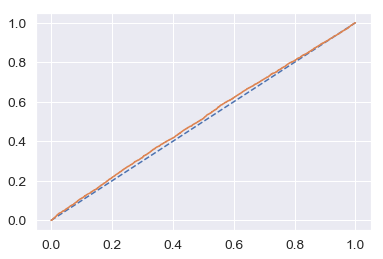

0.09255199432373047 0.09734086990356446 0.5059823287223868 0.507435196980199 0.5070158210771013 0.4980853934489846 0.5104184200327235


In [59]:
# Naive Bayes не имеет возможность использывать RFECV -> поэтому он будет использывать 
# данные с выбраными фичами для LR
nb = GaussianNB()
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(nb, selector_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

nb_fit_time = scores['fit_time'].mean()
nb_score_time = scores['score_time'].mean()
nb_accuracy = scores['test_accuracy'].mean()
nb_precision = scores['test_precision_macro'].mean()
nb_recall = scores['test_recall_macro'].mean()
nb_f1 = scores['test_f1_weighted'].mean()
nb_roc = scores['test_roc_auc'].mean()

nb.fit(selector_train, y_train)
y_pred = nb.predict(selector_test)
probs = nb.predict_proba(selector_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(nb_fit_time, nb_score_time, nb_accuracy, nb_precision, nb_recall, nb_f1, nb_roc)

# Random Forest

(108405, 6)
(16686, 6)
dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_weighted', 'test_roc_auc'])


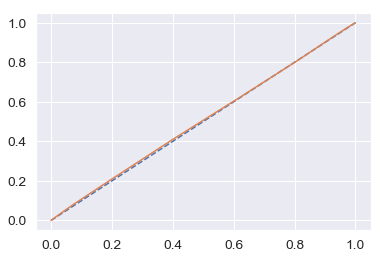

3.10890154838562 0.6177410125732422 0.5039803632982542 0.5050386455331767 0.5048222875747376 0.49892152270935125 0.5049875522445573


In [60]:
rf = RandomForestClassifier(n_jobs=-1)
selector = RFECV(rf)
select = selector.fit(x_train, y_train)
selector_train = select.transform(x_train)
selector_test = select.transform(x_test)
print(selector_train.shape)
print(selector_test.shape)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(rf, selector_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

print(scores.keys())
rf_fit_time = scores['fit_time'].mean()
rf_score_time = scores['score_time'].mean()
rf_accuracy = scores['test_accuracy'].mean()
rf_precision = scores['test_precision_macro'].mean()
rf_recall = scores['test_recall_macro'].mean()
rf_f1 = scores['test_f1_weighted'].mean()
rf_roc = scores['test_roc_auc'].mean()

rf.fit(selector_train, y_train)
y_pred = rf.predict(selector_test)
probs = rf.predict_proba(selector_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(rf_fit_time, rf_score_time, rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc)

# Gradient Boosting

(108405, 9)
(16686, 9)
dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_precision_macro', 'test_recall_macro', 'test_f1_weighted', 'test_roc_auc'])


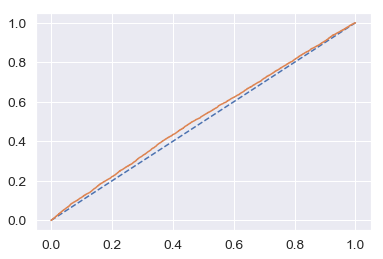

12.595192289352417 0.13364872932434083 0.5102902315093208 0.5100807605321099 0.5093571113563797 0.5036378515538852 0.5129344168247129


In [61]:
gb = GradientBoostingClassifier()
selector = RFECV(gb)
select = selector.fit(x_train, y_train)
selector_train = select.transform(x_train)
selector_test = select.transform(x_test)
print(selector_train.shape)
print(selector_test.shape)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(gb, selector_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

print(scores.keys())
gb_fit_time = scores['fit_time'].mean()
gb_score_time = scores['score_time'].mean()
gb_accuracy = scores['test_accuracy'].mean()
gb_precision = scores['test_precision_macro'].mean()
gb_recall = scores['test_recall_macro'].mean()
gb_f1 = scores['test_f1_weighted'].mean()
gb_roc = scores['test_roc_auc'].mean()

gb.fit(selector_train, y_train)
y_pred = gb.predict(selector_test)
probs = gb.predict_proba(selector_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(gb_fit_time, gb_score_time, gb_accuracy, gb_precision, gb_recall, gb_f1, gb_roc)

# K-Nearest Neighbors

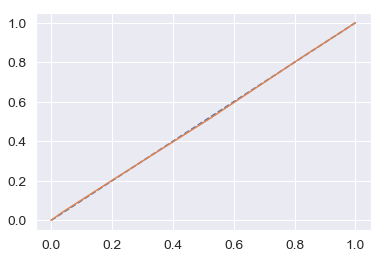

0.17532525062561036 8.07857551574707 0.5031686138939493 0.5030440361587155 0.5030408254586722 0.503057276690827 0.5045369357149156


In [62]:
# K-Nearest Neighbors не имеет возможность использывать RFECV -> поэтому он будет использывать 
# данные с выбраными фичами для Gradient Boosting
KNN = KNeighborsClassifier(n_jobs=-1)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, selector_train, y_train, scoring=scoring, cv=5, n_jobs=-1)

KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()


KNN.fit(selector_train, y_train)
y_pred = KNN.predict(selector_test)
probs = KNN.predict_proba(selector_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()

print(KNN_fit_time, KNN_score_time, KNN_accuracy, KNN_precision, KNN_recall, KNN_f1, KNN_roc)

# SAVE SCORES

In [ ]:
# Из-за того, что модели очень долго тренеруются я буду сохранять, 
# а потом загружать результаты их метрик, что бы иметь возможность 
# ими пользываться не повторяя весь долгий процесс тренировки заново.

In [63]:
df_scores_rfecv = pd.DataFrame(
    {
        'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'],
        'KNN': [KNN_accuracy, KNN_precision, KNN_recall, KNN_f1, KNN_roc],
        'LR':  [lr_accuracy,  lr_precision,  lr_recall,  lr_f1,  lr_roc ],
        'NB':  [nb_accuracy,  nb_precision,  nb_recall,  nb_f1,  nb_roc ],
        'DT':  [dt_accuracy,  dt_precision,  dt_recall,  dt_f1,  dt_roc ],
        'RF':  [rf_accuracy,  rf_precision,  rf_recall,  rf_f1,  rf_roc ],
        'GB':  [gb_accuracy,  gb_precision,  gb_recall,  gb_f1,  gb_roc ],
    }
)

df_scores_rfecv = df_scores_rfecv.set_index('Metrics')
df_scores_rfecv.to_csv('df_scores_rfecv.csv')
df_scores_rfecv

,KNN,LR,NB,DT,RF,GB
Metrics,,,,,,
Accuracy,0.503169,0.513353,0.505982,0.503510,0.503980,0.510290
Precision,0.503044,0.513122,0.507435,0.503489,0.505039,0.510081
Recall,0.503041,0.512615,0.507016,0.503489,0.504822,0.509357
F1_score,0.503057,0.509457,0.498085,0.503508,0.498922,0.503638
AUC_ROC,0.504537,0.516551,0.510418,0.503484,0.504988,0.512934


# LOAD SCORES

In [64]:
scores_rfecv = pd.read_csv('df_scores_rfecv.csv')

# Print Scores

In [65]:
scores_rfecv = scores_rfecv.set_index('Metrics')
scores_rfecv

,KNN,LR,NB,DT,RF,GB
Metrics,,,,,,
Accuracy,0.503169,0.513353,0.505982,0.503510,0.503980,0.510290
Precision,0.503044,0.513122,0.507435,0.503489,0.505039,0.510081
Recall,0.503041,0.512615,0.507016,0.503489,0.504822,0.509357
F1_score,0.503057,0.509457,0.498085,0.503508,0.498922,0.503638
AUC_ROC,0.504537,0.516551,0.510418,0.503484,0.504988,0.512934


# 5) Сравнение метрик по всем тестам. Выбор наилучшей модели

# Вычетание среднего значения по всем метрикам каждого столбца каждой таблицы

In [97]:
print(scores_init)
total_scores_init = pd.DataFrame(data=[[scores_init['KNN'].mean(), scores_init['LR'].mean(), scores_init['NB'].mean(),
                                        scores_init['DT'].mean(),  scores_init['RF'].mean(), scores_init['GB'].mean()]], 
                                 columns=['KNN', 'LR', 'NB', 'DT', 'RF', 'GB'], index=['Mean'])
total_scores_init

                KNN        LR        NB        DT        RF        GB
Metrics                                                              
Accuracy   0.502993  0.513150  0.505189  0.500715  0.501545  0.511213
Precision  0.502853  0.512930  0.506609  0.500677  0.502442  0.510939
Recall     0.502849  0.512414  0.506240  0.500677  0.502361  0.510304
F1_score   0.502845  0.509261  0.496962  0.500712  0.496759  0.505191
AUC_ROC    0.504506  0.516136  0.509324  0.500682  0.502831  0.513130


,KNN,LR,NB,DT,RF,GB
Mean,0.503209,0.512778,0.504865,0.500693,0.501188,0.510155


In [98]:
print(scores_corr)
total_scores_corr = pd.DataFrame(data=[[scores_corr['KNN'].mean(), scores_corr['LR'].mean(), scores_corr['NB'].mean(),
                                        scores_corr['DT'].mean(),  scores_corr['RF'].mean(), scores_corr['GB'].mean()]], 
                                 columns=['KNN', 'LR', 'NB', 'DT', 'RF', 'GB'], index=['Mean'])
total_scores_corr

                KNN        LR        NB        DT        RF        GB
Metrics                                                              
Accuracy   0.501794  0.513427  0.505346  0.500438  0.498446  0.506444
Precision  0.501684  0.513259  0.506412  0.500413  0.499223  0.505875
Recall     0.501682  0.512501  0.506201  0.500413  0.499249  0.505422
F1_score   0.501705  0.507257  0.499826  0.500436  0.493789  0.498720
AUC_ROC    0.501313  0.515947  0.510192  0.500403  0.500698  0.509825


,KNN,LR,NB,DT,RF,GB
Mean,0.501636,0.512478,0.505595,0.500421,0.498281,0.505257


In [99]:
print(scores_rfe)
total_scores_rfe = pd.DataFrame(data=[[scores_rfe['KNN'].mean(), scores_rfe['LR'].mean(), scores_rfe['NB'].mean(),
                                       scores_rfe['DT'].mean(),  scores_rfe['RF'].mean(), scores_rfe['GB'].mean()]], 
                                 columns=['KNN', 'LR', 'NB', 'DT', 'RF', 'GB'], index=['Mean'])
total_scores_rfe

                KNN        LR        NB        DT        RF        GB
Metrics                                                              
Accuracy   0.502956  0.513703  0.506148  0.500826  0.501730  0.509681
Precision  0.502835  0.513474  0.507085  0.500756  0.502657  0.509454
Recall     0.502833  0.512952  0.506934  0.500756  0.502550  0.508739
F1_score   0.502853  0.509667  0.501153  0.500797  0.496899  0.502866
AUC_ROC    0.504406  0.516931  0.511298  0.500756  0.503384  0.513562


,KNN,LR,NB,DT,RF,GB
Mean,0.503177,0.513345,0.506524,0.500778,0.501444,0.508861


In [103]:
print(scores_rfecv)
total_scores_rfecv = pd.DataFrame(data=[[scores_rfecv['KNN'].mean(), scores_rfecv['LR'].mean(), scores_rfecv['NB'].mean(),
                                         scores_rfecv['DT'].mean(),  scores_rfecv['RF'].mean(), scores_rfecv['GB'].mean()]], 
                                 columns=['KNN', 'LR', 'NB', 'DT', 'RF', 'GB'], index=['Mean'])
total_scores_rfecv

                KNN        LR        NB        DT        RF        GB
Metrics                                                              
Accuracy   0.503169  0.513353  0.505982  0.503510  0.503980  0.510290
Precision  0.503044  0.513122  0.507435  0.503489  0.505039  0.510081
Recall     0.503041  0.512615  0.507016  0.503489  0.504822  0.509357
F1_score   0.503057  0.509457  0.498085  0.503508  0.498922  0.503638
AUC_ROC    0.504537  0.516551  0.510418  0.503484  0.504988  0.512934


,KNN,LR,NB,DT,RF,GB
Mean,0.50337,0.51302,0.505787,0.503496,0.50355,0.50926


# Выбор самой точной модели среди всех тестов (таблиц)

In [128]:
columns = total_scores_init.columns
tables = ['scores_init', 'scores_corr', 'scores_rfe', 'scores_rfecv']
total_tables = [total_scores_init, total_scores_corr, total_scores_rfe, total_scores_rfecv]
best_table = None
best_method = None
value = 0

for df, table in zip(total_tables, tables):
    max_val = np.argmax(df.values)
    print('Column: ', columns[max_val], '--- Score:', df.values[0][max_val])
    if value < df.values[0][max_val]:
        best_table = table
        value = df.values[0][max_val]
        best_method = columns[max_val]
    
print('\nBest table: ', best_table, '\nBest method: ', best_method, '\nScore:', value)

Column:  LR --- Score: 0.512778133836391
Column:  LR --- Score: 0.5124780788975477
Column:  LR --- Score: 0.5133454771690698
Column:  LR --- Score: 0.5130196324086387

Best table:  scores_rfe 
Best method:  LR 
Score: 0.5133454771690698


# Самой точной моделью оказалась Logistic Regression с feature selection RFE

# 6) GRID SEARCH гиперпараметров на лучшей моделе

(108405, 10)
(16686, 10)
{'logisticregression__C': 0.08858667904100823, 'logisticregression__max_iter': 100, 'logisticregression__tol': 0.0001} 0.5148009778146765


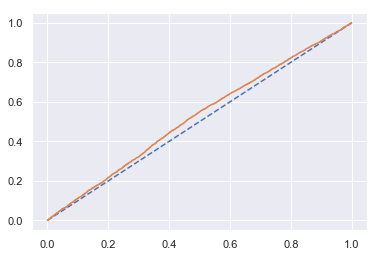

0.5200767110152223


In [5]:
lr = LogisticRegression(n_jobs=-1)
selector = RFE(lr)
select = selector.fit(x_train, y_train)
selector_train = select.transform(x_train)
selector_test = select.transform(x_test)
print(selector_train.shape)
print(selector_test.shape)

# Creating grid model
my_pipeline = pipeline.make_pipeline(lr)
features_params = {
    'Tol': [0.00001, 0.0001, 0.001],
    'Max_iter': [100, 200, 400, 1000],
    'C' : np.logspace(-4, 4, 20)
}

param_grid = [{
    'logisticregression__tol': features_params['Tol'],
    'logisticregression__max_iter': features_params['Max_iter'],
    'logisticregression__C': features_params['C']
}]

gs = GridSearchCV(estimator=my_pipeline, param_grid=param_grid, n_jobs=-1, cv=5)
gs = gs.fit(selector_train, y_train)
model_pipeline = gs.fit(selector_train, y_train).best_estimator_
print(gs.best_params_, gs.best_score_ )

gs.fit(selector_train, y_train)
y_pred = gs.predict(selector_test)
probs = gs.predict_proba(selector_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.show()
print(accuracy_score(y_test, y_pred))